# Image segmentation for self-driving car

Welcome to Image segmentation for self-driving car project.
In this project I will explore about semantic image segmentation for self-driving car.
In this jupyter notebook I am going to go through the complete process of the project along with code snippets.

## Table of Content
- [1 - Problem statement](#1)
    - [1.1 - The goals of the project](#1-1)
    - [1.2 - The challenges of the project](#1-2)
- [2 - Introduction to the Problem](#2)
    - [2.1 - What is image segmentation?](#2-1)
    - [2.2 - Types of image segmentation](#2-2)
        - [2.2.1 - Image semantic segmentation](#2-2-1)
        - [2.2.2 - Image Instance segmentation](#2-2-2)
        - [2.2.3 - Image Panoptic segmentation](#2-2-3)
    - [2.3 - Image segmentation Methods](#2-3)
        - [2.3.1 - Traditional Methods](#2-3-1)
        - [2.3.2 - Deep learning Methods](#2-3-2)
- [3 - CityScapes dataset](#3)
    - [3.1 - Features](#3-1)
    - [3.2 - Classes](#3-2)
- [4 - Packages](#4)
- [5 - Preprocessing](#5)
    - [5.1 - Load and split our data to train/dev/test datasets](#5-1)  
    " Change ignoreInEval in labels and check if I can reduce amount of ids. Write about this in explnation"
    - [5.2 - Process Labels](#5-2)
    - [5.3 - Process path](#5-3)
    - [5.4 - Explore train dataset](#5-4)
    - [5.5 - Preprocessing the dataset](#5-5) 
        - [5.5.1 - Why we need to resize our dataset?](#5-5-1)
        - [5.5.2 - Why we need to normalize our dataset?](#5-5-2)
        - [5.5.3 - Code Preprocessing function](#5-5-3)
    - [5.6 - Data augmentation](#5-6)
        - [5.6.1 - What is Data augmentation and why we use this?](#5-6-1)
        - [5.6.2 - Why some data augmentation techniques is not good for self-driving car?](#5-6-2)
        - [5.6.3 - Which data augmentation techniques is still good for self-driving car?](#5-6-3)
        - [5.6.4 - Code Data augmentation](#5-6-4)
    - [5.7 - Divide our train dataset to mini batches and shuffle our train dataset](#5-7)
    - [5.8 - Use prefetch](#5-8)
- [6 - Unet explanation](#6)
    - [6.1 - What is Unet?](#6-1)
    - [6.2 - Unet model detials](#6-2)
        - [6.2.1 - Unet model genral detials and Architecture](#6-2-1)
        - [6.2.2 - Unet Encoder](#6-2-2)
        - [6.2.3 - Unet Decoder](#6-2-3)
        - [6.2.4 - Unet Connecting paths](#6-2-4)
        - [6.2.5 - Unet bottlenack](#6-2-5)
        - [6.2.6 - Initialization of the weights](#6-2-6)
        - [6.2.7 - Regulzation](#6-2-7)
    - [6.3 - Pros and Cons of Unet](#6-3)
        - [6.3.1 - Pros of Unet](#6-3-1)
        - [6.3.2 - Cons of Unet](#6-3-2)
- [7 - Cost functions and evaluation metrics](#7)
    - [7.1 - Pixel accuracy](#7-1)
    - [7.2 - What is the problem of pixel accuracy?](#7-2)
    - [7.3 - Sparse Categorical Cross entropy](#7-3)
    - [7.4 - Why still Sparse Categorical Cross entropy is not good enough?](#7-4)
    - [7.5 - The solutions for highly unbalanced segmentations and giving importance to certain pixels](#7-5)
        - [7.5.1 - Weighted Sparse Categorical Cross entropy for each class](#7-5-1)
        - [7.5.2 - Weighted Sparse Categorical Cross entropy for each pixel](#7-5-2)
        - [7.5.3 - Dice Coefficient and soft Dice Coefficient](#7-5-3)
            - [7.5.3.1 - What is Precision and Recall?](#7-5-3-1)
            - [7.5.3.2 - What is F1 score?](#7-5-3-2)
            - [7.5.3.3 - Dice Coefficient explanation and formula explanation](#7-5-3-3)
            - [7.5.3.4 - Soft Dice Coefficient](#7-5-3-4)
            - [7.5.3.5 - Why Soft Dice Coefficient is good?](#7-5-3-5)
    Need to think if I want to cover the silding window method without resizing. If not so I neet to change my explnation in section 5.5.1
- [8 - Start build Unet model](#8)

<a name='1'></a>
## 1 - Problem statement

Our problem is to explore Unet architectures for do semantic segmentation for self-driving car on Cityscapes dataset
and try to get the lowest Computational Cost, lowest storage and the best accuracy.

<a name='1-1'></a>
### 1.1 - The goals of the project
The goals of the project are:

* To explore semantic segmentation for self-driving car.
* To explore how Unet architectures work for self-driving car.
* To get the the lowest Computational Cost, lowest storage and the best accuracy that I can on Cityscapes Dataset when I use Unet architectures.
* To explore different Unet architectures and different methods that will help to achieve the thrid goal
and compare between them.

<a name='1-2'></a>
### 1.2 - The challenges of the project
The challenges of the project are:

* Our data set is contains large images. This is Makes it difficult for us to do semantic segmentation problem for self-driving car and increases the Computational Cost and storage. This leads us to use complex architectures for get good accuracy and therefore we encounter situation that we need to striking balance the trade off between accuracy of the model and Computational Cost and storage.

* Self-driving car tasks are real-time tasks and therefore we must to solve the problem with the lowest Computational Cost, lowest storage and use efficient segmentation algorithms

* Self-driving car tasks are difficlut, because there are many situations we can encounter while driving, for example: different weather conditions, daytime vs nighttime, different road conditions, blurry noisable and unintelligible images and more.

* Our data set contain 30 classes, so we have a lot of classes.

* Semantic segmentation for self-driving car is difficult. We need to achieve high accuracy in pixel-level segmentation for ensure safe driving. Even small error can lead significant consequences.

* Because we have limited dataset size we have more chance for overfitting.

* Because we have limited dataset size we have more chance for bad generalization and bad adaptation to scenarios and environments that the model don't saw.

<a name='2'></a>
## 2 - Introduction to the Problem
In this section I will give some introduction to the Problem.
I will explain briefly about image segmentation.

<a name='2-1'></a>
### 2.1 - What is image segmentation?
Image segmentation is a famous task in computer vision.

Image segmentation is the process of dividing an image into multiple meaningful regions or objects based on their inherent characteristics, such as color, texture, shape, or brightness. 

In this way we can get more information about the image and we can easier to analyze the image.
For example in self-driving car tasks we can get better scene understanding and get desicions accrding this, like stop if we close to car or pedestrian.

<a name='2-2'></a>
### 2.2 - Types of image segmentation
There are 3 types of image segmentation: semantic segmentation, instance segmentation and panoptic segmentation.

In this project I will work on semantic segmentation but now I will cover briefly all the 3 types of image segmentation.

<a name='2-2-1'></a>
#### 2.2.1 - Image semantic segmentation
Image semantic segmentation is a famous task in computer vision of labelling each pixel of the image into a predefined set of classes.
That mean that we ask the following question:

"What objects are in this image and where exactly in the image are those objects located? 
Give me precise mask for each object in the image by labeling each pixel in the image with its corresponding class."

For example:

<div style="text-align:center">
<img src="Images/semantic segmentation.webp" style="width:500px;height:250;">
</div>
<caption><center> <u><b>Figure 1</u></b>: Example of a semantic segmented image <a href="https://medium.com/analytics-vidhya/introduction-to-semantic-image-segmentation-856cda5e5de8">(Source)</a> <br> </center></caption>

<a name='2-2-2'></a>
#### 2.2.2 - Image instance segmentation
Image instance segmentation involves detecting and segmenting each object in an image.

Differently from semantic segmentation that labelling each pixel of the image into a predefined set of classes, this type of segmentation segmenting the object’s boundaries.
That mean that we ask the following question:

"What objects are in this image and what the boundaries of those objects?"

For example:

<div style="text-align:center">
<img src="Images/Instance segmentation input.png" style="width:500px;height:300px;">
<img src="Images/Instance segmentation output.png" style="width:500px;height:300px;">
</div>
<caption><center> <u><b>Figure 2</u></b>: Example of a instance segmented image<br> </center></caption>


<a name='2-2-3'></a>
#### 2.2.3 - Image panoptic segmentation
Panoptic segmentation generalizes both semantic and instance segmentation.

That mean that we ask the following question:

"What different objects are in this image and where exactly in the image are those objects located?
Give me precise mask for each object in the image by labeling each pixel in the image with its corresponding class and distinguish between objects that are different from the same class."

This type of image segmentation get the most information from the image, because he knows also tell where there are different object. For example in self-driving car taks this is important because we want to know what and where the different objects but also want to distinguish between different cars or pedestrians.

For example:

<div style="text-align:center">
<img src="Images/Panoptic segmentation input.png" style="width:500px;height:300;">
<img src="Images/Panoptic segmentation output.png" style="width:500px;height:300;">
</div>
<caption><center> <u><b>Figure 3</u></b>: Example of a panoptic segmented image<br><a href="https://medium.com/hasty-ai/panoptic-segmentation-explained-ca10597fb357">(Source)</a> </center></caption>


<a name='2-3'></a>
### 2.3 - Image segmentation Methods
In this project I will explore Unet architectures for image semantic segmentation.

Now I will cover briefly Image segmentation methods.

<a name='2-3-1'></a>
#### 2.3.1 - Traditional Methods
Traditional methods for image segmentation are usually computationally efficient and relatively simple to implement(for example relatively to deep learning methods). 

Some examples of traditional methods for image segmentation are:
* Thresholding like: Global thresholding and Adaptive thresholding
* Edge-based Segmentation like: Canny edge detection and Sobel edge detection
* Clustering like: K-means clustering

Traditional image segmentation methods are more suitable for simpler image segmentation and have limited accuracy on complex scenes. 

Therefore when deep learning field start raise, pepole started use deep learning methods for image segmentation tasks, because they are have high accuracy(relatively to traditional methods) on complex scenes and suitable not only for simpler image segmentation, but also for complex image segmentation.

<a name='2-3-2'></a>
#### 2.3.2 - Deep learning Methods
Deap learning methods for image segmentation are less computationally efficient than Traditional methods for image segmentation and relatively complex to implement. 

As I said in section 2.3.1 deap learning methods for image segmentation are have high accuracy(relatively to traditional methods) on complex scenes and suitable not only for simpler image segmentation, but also for complex image segmentation.

Some examples of deap learning methods for image segmentation are:
* U-Net, in this project I will explore Unet architectures for image semantic segmentation.
* SegNet
* DeepLab
* Panoptic FPN
* FCN

<a name='3'></a>
## 3 - CityScapes dataset
In this project I will use the CityScapes dataset. 

In this section I will give overiew of CityScapes dataset.

<a name='3-1'></a>
### 3.1 - Features
The features of CityScapes dataset that I use according the <a href="https://www.cityscapes-dataset.com/dataset-overview/#features">CityScapes site</a>, are:

* Complexity
    * 30 classes
    * See Class Definitions in section 3.2

* Diversity
    * 50 cities
    * Several months (spring, summer, fall)
    * Daytime
    * Good/medium weather conditions
    * Manually selected frames
        * Large number of dynamic objects
        * Varying scene layout
        * Varying background

* Volume
    * 5000 annotated images with fine annotations

* Images dimensions
    * 2048x1024 pixels 

* Division into train/dev/test sets
    * Train set contains 2975 images, that mean the size of the train set is 59.5% of the dataset.
    * Dev(or validation set) set contains 500 images, that mean the size of the dev set is 10% of the dataset. 
    * Test set contains 1,525 images, that mean the size of the dev set is 30.5% of the dataset.

    In summary, the dataset division into train/dev/test sets is 59.5%/10%/30.5%.
    For Now we will keep this division and if we will need we will change this division in the future.
    In total this is a logical division into train/dev/test, according our dataset size.
    
<div style="text-align:center">
<img src="Images/cityscapesCities.jpg" style="width:500px;height:400px;">
</div>
<caption><center> <u><b>Figure 4</u></b>: Contained cities in CityScapes dataset<br><a href="https://www.cityscapes-dataset.com/dataset-overview/#features">(Source)</a> </center></caption>

<a name='3-2'></a>
### 3.2 - Classes
The Classes of CityScapes dataset according the CityScapes site</a>, are:
<div style="text-align:center">
<img src="Images/cityscapesClasses.png" style="width:700px;height:400px;">
</div>
<caption><center> <u><b>Figure 5</u></b>: Contained classes in CityScapes dataset<br><a href="https://www.cityscapes-dataset.com/dataset-overview/#features">(Source)</a> </center></caption>

The classes of CityScapes dataset for semantic segmentation are described in the picture without sign and with * sign.

In summary for semantic segmentation task we have 8 groups and 19 classes.  

<a name='4'></a>
## 4 - Packages
After all the introduction to the project, let's start work on project and import all the libraries that we need.

In [5]:
import tensorflow as tf
import numpy as np
import os
import imageio
import cv2 as cv
import matplotlib.pyplot as plt
from typing import Tuple

from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout 
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import concatenate


<a name='5'></a>
## 5 - Preprocessing
In this section I will preprocess the data set. This is an important and essential part before I start building a model to solve my problem.

<a name='5-1'></a>
### 5.1 - Load and split our data to train/dev/test datasets

Firstly I will get the paths of all the images and all the masks in the train/dev/test datasets.

In [6]:
train_images_top_directory = './data/leftImg8bit_trainvaltest/leftImg8bit/train/'
train_masks_top_directory = './data/gtFine_trainvaltest/gtFine/train/'
dev_images_top_directory = './data/leftImg8bit_trainvaltest/leftImg8bit/val/'
dev_masks_top_directory = './data/gtFine_trainvaltest/gtFine/val/'
test_images_top_directory = './data/leftImg8bit_trainvaltest/leftImg8bit/test/'
test_masks_top_directory = './data/gtFine_trainvaltest/gtFine/test'

train_images_path = [os.path.join(root, file) for root, dirs, files in os.walk(train_images_top_directory)
                                           for file in files
                                           if file.endswith('.jpg') or file.endswith('.png')]
train_masks_path = [os.path.join(root, file) for root, dirs, files in os.walk(train_masks_top_directory)
                                           for file in files
                                           if file.endswith('labelIds.jpg') or file.endswith('labelIds.png')]

dev_images_path = [os.path.join(root, file) for root, dirs, files in os.walk(dev_images_top_directory)
                                           for file in files
                                           if file.endswith('.jpg') or file.endswith('.png')]
dev_masks_path = [os.path.join(root, file) for root, dirs, files in os.walk(dev_masks_top_directory)
                                           for file in files
                                           if file.endswith('labelIds.jpg') or file.endswith('labelIds.png')]

test_images_path = [os.path.join(root, file) for root, dirs, files in os.walk(test_images_top_directory)
                                           for file in files
                                           if file.endswith('.jpg') or file.endswith('.png')]
test_masks_path = [os.path.join(root, file) for root, dirs, files in os.walk(test_masks_top_directory)
                                           for file in files
                                           if file.endswith('labelIds.jpg') or file.endswith('labelIds.png')]

Now We will use tensorflow in order to do load our datasets efficiently.

Firstly we will use tf.data.Dataset.from_tensor_slices method for create datasets from our lists of the images paths.

In [7]:
train_images_path = tf.constant(train_images_path)
train_masks_path = tf.constant(train_masks_path)

dev_images_path = tf.constant(dev_images_path)
dev_masks_path = tf.constant(dev_masks_path)

test_images_path = tf.constant(test_images_path)
test_masks_path = tf.constant(test_masks_path)

train_image_dataset_before_path_processing = tf.data.Dataset.from_tensor_slices((train_images_path, train_masks_path))
dev_image_dataset_before_path_processing = tf.data.Dataset.from_tensor_slices((dev_images_path, dev_masks_path))
test_image_dataset_before_path_processing = tf.data.Dataset.from_tensor_slices((test_images_path, test_masks_path))

<a name='5-2'></a>
### 5.2 - Process Labels
In this section I will process the labels in the dataset.

For each image in the datasets we have corresponding mask image that represents segmantation map of our image. For each object we have unique color, that represents object's label.
How we will know what the pixel's label, what the label represents, to which catagory of labels he belongs, which labels we will need to take in considaration when we evalute our models?

The solution for these questions is to create list of Labels, when each label will contain her features and with this solution we will can for example to convert color to the corresponding label id in order to encode our mask to segmatation map that contatins the labels ids.

Let's start create label class:

In [8]:
class Label:
    def __init__(self, name: str, id: int, catagory: str, catagory_id: int, has_instances: bool,
               ignore_in_eval: bool, color: Tuple[int, int, int]):
        self.__name = name
        self.__id = id
        self.__catagory = catagory
        self.__catagory_id = catagory_id
        self.__has_instances = has_instances
        self.__ignore_in_eval = ignore_in_eval
        self.__color = color

    def get_name(self) -> str:
        return self.__name
    
    def get_id(self) -> int:
        return self.__id
    
    def get_catagory(self) -> str:
        return self.__catagory
    
    def get_catagory_id(self) -> int:
        return self.__catagory_id
    
    def is_has_instances(self) -> bool:
        return self.__has_instances
    
    def is_ignore_in_eval(self) -> bool:
        return self.__ignore_in_eval
    
    def get_color(self) -> Tuple[int, int, int]:
        return self.__color
    
    def get_color_label_for_id(labels, search_id: int) -> Tuple[int, int, int]:
        for label in labels:
            if label.get_id() == search_id:
                return label.get_color()

Now I will initialize the list of the Labels in our dataset, inspired by this <a href="https://github.com/mcordts/cityscapesScripts/blob/master/cityscapesscripts/helpers/labels.py">page</a> and according section
3.2:

In [9]:
labels = [
    #       name                     id      category            catagory Id     hasInstances   ignoreInEval   color
    Label(  'unlabeled'            ,  0 ,    'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'ego vehicle'          ,  1 ,    'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'rectification border' ,  2 ,    'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'out of roi'           ,  3 ,    'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'static'               ,  4 ,    'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'dynamic'              ,  5 ,    'void'            , 0       , False        , True         , (111, 74,  0) ),
    Label(  'ground'               ,  6 ,    'void'            , 0       , False        , True         , ( 81,  0, 81) ),
    Label(  'road'                 ,  7 ,    'flat'            , 1       , False        , False        , (128, 64,128) ),
    Label(  'sidewalk'             ,  8 ,    'flat'            , 1       , False        , False        , (244, 35,232) ),
    Label(  'parking'              ,  9 ,    'flat'            , 1       , False        , True         , (250,170,160) ),
    Label(  'rail track'           , 10 ,    'flat'            , 1       , False        , True         , (230,150,140) ),
    Label(  'building'             , 11 ,    'construction'    , 2       , False        , False        , ( 70, 70, 70) ),
    Label(  'wall'                 , 12 ,    'construction'    , 2       , False        , False        , (102,102,156) ),
    Label(  'fence'                , 13 ,    'construction'    , 2       , False        , False        , (190,153,153) ),
    Label(  'guard rail'           , 14 ,    'construction'    , 2       , False        , True         , (180,165,180) ),
    Label(  'bridge'               , 15 ,    'construction'    , 2       , False        , True         , (150,100,100) ),
    Label(  'tunnel'               , 16 ,    'construction'    , 2       , False        , True         , (150,120, 90) ),
    Label(  'pole'                 , 17 ,    'object'          , 3       , False        , False        , (153,153,153) ),
    Label(  'polegroup'            , 18 ,    'object'          , 3       , False        , True         , (153,153,153) ),
    Label(  'traffic light'        , 19 ,    'object'          , 3       , False        , False        , (250,170, 30) ),
    Label(  'traffic sign'         , 20 ,    'object'          , 3       , False        , False        , (220,220,  0) ),
    Label(  'vegetation'           , 21 ,    'nature'          , 4       , False        , False        , (107,142, 35) ),
    Label(  'terrain'              , 22 ,    'nature'          , 4       , False        , False        , (152,251,152) ),
    Label(  'sky'                  , 23 ,    'sky'             , 5       , False        , False        , ( 70,130,180) ),
    Label(  'person'               , 24 ,    'human'           , 6       , True         , False        , (220, 20, 60) ),
    Label(  'rider'                , 25 ,    'human'           , 6       , True         , False        , (255,  0,  0) ),
    Label(  'car'                  , 26 ,    'vehicle'         , 7       , True         , False        , (  0,  0,142) ),
    Label(  'truck'                , 27 ,    'vehicle'         , 7       , True         , False        , (  0,  0, 70) ),
    Label(  'bus'                  , 28 ,    'vehicle'         , 7       , True         , False        , (  0, 60,100) ),
    Label(  'caravan'              , 29 ,    'vehicle'         , 7       , True         , True         , (  0,  0, 90) ),
    Label(  'trailer'              , 30 ,    'vehicle'         , 7       , True         , True         , (  0,  0,110) ),
    Label(  'train'                , 31 ,    'vehicle'         , 7       , True         , False        , (  0, 80,100) ),
    Label(  'motorcycle'           , 32 ,    'vehicle'         , 7       , True         , False        , (  0,  0,230) ),
    Label(  'bicycle'              , 33 ,    'vehicle'         , 7       , True         , False        , (119, 11, 32) ),
    Label(  'license plate'        , -1 ,    'vehicle'         , 7       , False        , True         , (  0,  0,142) ),
]


<a name='5-3'></a>
### 5.3 - Process path
In this section I will process the format and the type of the datasets.
I will decode each img and convert her to floast32 type.

This is essential process because in order our model will work good and will not happen bugs, we need that all the images in our datasets will be in the same format and with the same type.

In addition, I will resize each mask image, because now our mask's shape is (2048, 1024, 3), but for each pixel all his three chanels have the same value, because this is labal ids mask and not rgb mask for visualizetion.
Thus we will resize each mask image to shape (2048, 1024), that mean now each value of pixel will be the label id of the pixel, according section 5.2 .
 
We will convert all the images in our datasets to png format and to float32 type.

In [10]:
def process_path(image_path, mask_path):
    img = tf.io.read_file(image_path)  
    img = tf.image.decode_png(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32) 

    mask = tf.io.read_file(mask_path)  
    mask = tf.image.decode_png(mask, channels=3)
    mask = tf.math.reduce_max(mask, axis=-1, keepdims=True)

    return img, mask


In [11]:
train_image_dataset_before_pre_processing = train_image_dataset_before_path_processing.map(process_path)
dev_image_dataset_before_pre_processing = dev_image_dataset_before_path_processing.map(process_path)
test_image_dataset_before_pre_processing = test_image_dataset_before_path_processing.map(process_path)

<a name='5-4'></a>
### 5.4 - Explore dataset
In this section I will explore our dataset, in order I will get better familiar with the dataset.

Firstly, let's see the sizes of our datasets:

In [12]:
train_image_dataset_m = len(train_image_dataset_before_path_processing)
dev_image_dataset_m = len(dev_image_dataset_before_path_processing)
test_image_dataset_m = len(test_image_dataset_before_path_processing)

print("Train dataset size is: " + str(train_image_dataset_m))
print("Dev dataset size is: " + str(dev_image_dataset_m))
print("Test dataset size is: " + str(test_image_dataset_m))

Train dataset size is: 2975
Dev dataset size is: 500
Test dataset size is: 1525


Before we start plot some examples of images and their corresponding masks from the train dataset,
we need to create a function that can convert a mask to a visualization mask.

What this is mean?
So, our masks are label ids mask, that mean each pixel in the mask have only one value, that represents his label id, according section 5.2.
Now in order visulaize our mask we need to convert each label id to his corresponding color, according section 5.2.

This function is importent, because visualization mask give us better understanding of the segmantation,
and for pepole that does not knows what is label ids(like pepole that not understanding DL) they are can better understanding the segmantation with visualization mask.

In summary, visualization mask is more beautiful :)

In [13]:
def convert_mask_to_visualization_mask(mask, labels):
    height, width, _ = mask.shape
    visualize_mask = np.zeros((height, width, 3), dtype=int)
    new_mask = tf.math.reduce_max(mask, axis=-1, keepdims=False)
    for label in labels:
        visualize_mask[new_mask[:,:] == label.get_id(), :] = label.get_color()
    return visualize_mask

Now let's plot some exampels of images and their corresponding visualization masks from the train dataset:

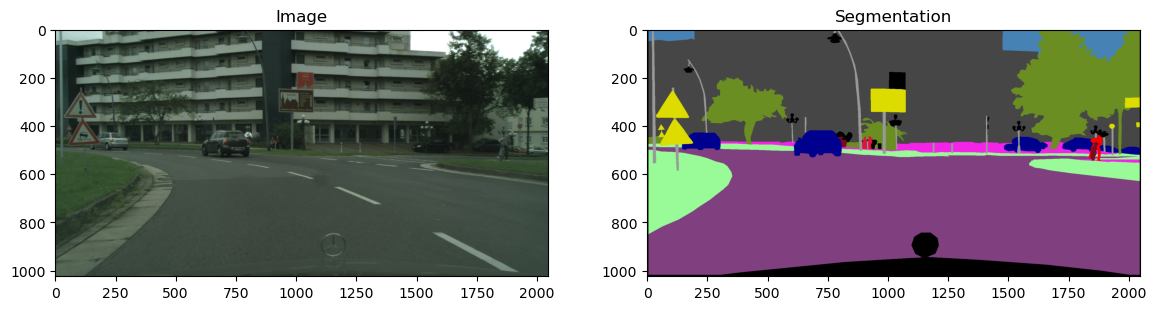

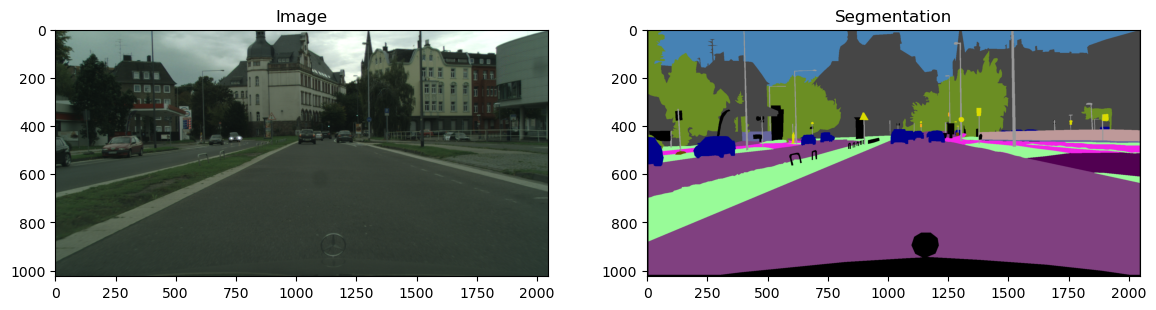

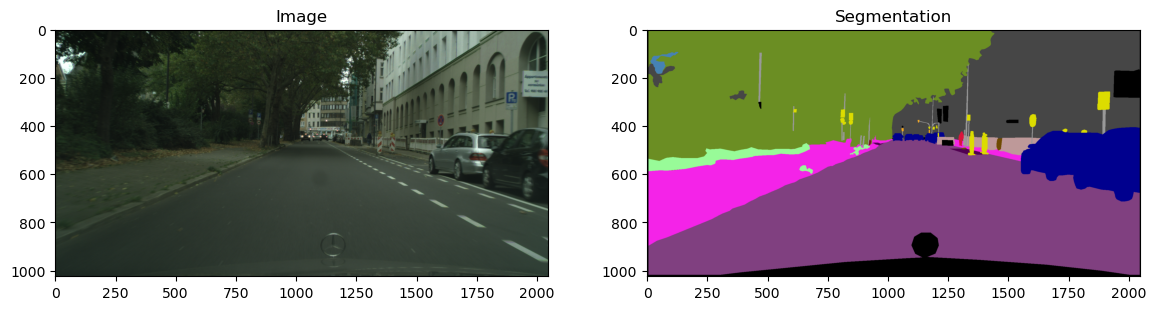

In [14]:
def plot_example(img, mask):
    fig, arr = plt.subplots(1, 2, figsize=(14, 10))
    arr[0].imshow(img)
    arr[0].set_title('Image')
    arr[1].imshow(mask)
    arr[1].set_title('Segmentation')


amount_of_exampels_to_plot = 3 
for rgb_img, mask in train_image_dataset_before_pre_processing:
    if amount_of_exampels_to_plot:
        visualize_mask = convert_mask_to_visualization_mask(mask, labels)
        plot_example(rgb_img, visualize_mask)
        amount_of_exampels_to_plot -= 1
    else:
        break

<a name='5-5'></a>
### 5.5 - Preprocessing the dataset
In this section I will cover the part of Preprocessing the dataset that include:
* Resize our dataset
* Normalize our dataset

<a name='5-5-1'></a>
#### 5.5.1 - Why we need to resize our dataset?
Our dataset contains images with dimensions of 2048x1024 pixels, that mean we are handle with large images.
Most of the models architectures in DL are not suitable for images of this size.

However we can change these models architectures in order they will be suitable for images of this size,
but the result of this operation is to create very big and deep architectures what lead to higher computational cost and higher storage.
Also, usually big and deep architectures tends to be with higher chance for overfitting, because they are more complex.
There are other problems with large and deep architectures such as vanishing and exploding gradients (because they are deep).

Now let's recall our problem. Our problem is to do semantic segmentation for self-driving car, so we need to build model for Real-Time problem.
Thus, we need to create model with the lowest Computational Cost an the lowest storage as we can.
And of course, we not want to create model with higher chance for overfitting, because we need that our model has a succseful adaptive for new images and has high accuarcy on the dev dataset and test dataset.

Thus, we can not use large images because this leed to problem, that can leed our model to slower performence in Real-Time and bad adaptive for new images, what can lead to for accidents(let's recal our problem is for self-driving car, so we need to create fastest and safe(make as few mistakes as possible) model).

Therefore, we will resize our images to 572x286 pixels.

There is one more method if we not want to resize our large images that is do sliding window on the large image and give to our model small images from the large image, and thus we still have the regular model without changes.

I will describe more in detail this method later in the project.

<a name='5-5-2'></a>
#### 5.5.2 - Why we need to normalize our dataset?
Our dataset is not normalized in the beginning and we need to normalize him,
that mean to do opeartion that will lead that all our pixels in the images on the dataset will be in the same scale and between 0 and 1 inclusive.

But why we need to do this? 
1. **Sigmoid and tanh activations:** 

    Sigmoid and tanh activations are sometimes used in DL(usually sigmoid used in the output layer) and they are look like this:
    <div style="text-align:center">
    <img src="Images/Sigmoid.webp" style="width:500px;height:250px;">
    <img src="Images/tanh.webp" style="width:500px;height:250px;">
    </div>
    <caption><center> <u><b>Figure 6</u></b>: Sigmoid and tanh functions <a href="https://medium.com/@toprak.mhmt/activation-functions-for-deep-learning-13d8b9b20e">(Source)</a> <br> </center></caption>

    We can see that when z is become larger and larger number or become smaller and smaller number the slope of the Sigmoid and tanh functions gets closer and closer to zero, that mean:
    
    When f(z) = sigmoid(z) and g(z) = tanh(z) then:
     $$\lim_{{z \to +-\infty}} \frac{df(z)}{dz} = 0$$ 
     $$\lim_{{z \to +-\infty}} \frac{dg(z)}{dz} = 0$$

    So if our pixels in the images on the dataset will be between 0 and 255 inclusive so there is a bigger chance that z will be larger(in different layers) and thus the slope of the Sigmoid and tanh functions gets around zero, which will lead that the gradients will be around zero and thus the network will be more slowly learn the optimal parameters for the network.

    We want that the network will learn the optimal parameters for the network, as fast as possible, and thus we need that all our pixels in the images on the dataset will be between 0 and 1 inclusive(in this way the slope of the sigmoid and tanh functions probably will not gets around zero, at least in the beginning of the learning). 

2. **Lower cost function and gradients**

    If our pixels in the images on the dataset will not be between 0 and 1 inclusive, but will be between 0 and 255 inclusive, so if we using Relu(what very commonly used in DL) also the activations values will be huge and thus after the forward pass we will end up with hugh loss value and hugh gradients values.

    Hugh loss value will lead the network be more slowly learn the optimal parameters for the network.
    
    Hugh gradients values can lead that the cost function not decrease after each iteration, because in the update parameters part we will change each parameter with relativly big value. 
    We can try prevent this with set very small learning rate, but this will cause to the network be more slowly learn the optimal parameters for the network, and this is not good.

    The solution of this problem is to do that all our pixels in the images on the dataset will be between 0 and 1 inclusive.

    <div style="text-align:center">
    <img src="Images/Relu.webp" style="width:500px;height:250px;">
    </div>
    <caption><center> <u><b>Figure 7</u></b>: Relu function <a href="https://medium.com/@toprak.mhmt/activation-functions-for-deep-learning-13d8b9b20e">(Source)</a> <br> </center></caption>

3. **Avoid weird mathematical artifacts with floating-point number precision**

    If our pixels in the images on the dataset will not be between 0 and 1 inclusive, but will be between 0 and 255 inclusive, so if we using Relu(what very commonly used in DL) also the activations values will be huge, and this can lead us to handle mathematical operations in our network on really large or really small numbers.

    When we handle mathematical operations on really large or really small numbers we can loss information and lose accuracy, because computers lose accuracy when performing math operations on really large or really small numbers.

    The solution of this problem is to do that all our pixels in the images on the dataset will be between 0 and 1 inclusive(now we will work on numbers that are not really large and not really small numbers).

4. **Fastest learning**

    If our pixels in the images on the dataset will not be in the same scale so the parameters that associated with each pixel will be in different scale.

    Assume that we have 2 pixels and they are have 2 parameters that associated with them. They(the parameters) are will be in different scale and the cost function will be like in this image:

    <div style="text-align:center">
    <img src="Images/cost_func_with_diff_scale.png" style="width:500px;height:250;">
    </div>
    <caption><center> <u><b>Figure 8</u></b>: Cost function with parameters that have different scale <a href="https://www.coursera.org/specializations/deep-learning">From andraw ng course</a> <br> </center></caption>


    Let's recall that we want to minimize the cost function, but with this cost function the minimize process will be more slower, because each parmeter has different scale, and thus if we want our cost function to converge we need set our learning rate to small number.

    Setting our learning rate to small number will cause to the network be more slowly learn the optimal parameters for the network, and this is not good. 

    Thus, we need that our pixels in the images on the dataset will be in the same scale, and in this situation our cost function will probably looks like this(with two parameters):

    <div style="text-align:center">
    <img src="Images/cost_func_with_same_scale.png" style="width:500px;height:250;">
    </div>
    <caption><center> <u><b>Figure 9</u></b>: Cost function with parameters that have same scale <a href="https://www.coursera.org/specializations/deep-learning">From andraw ng course</a> <br> </center></caption>

    With this cost function the minimize process will be more faster.

<a name='5-5-3'></a>
#### 5.5.3 - Code Preprocessing function

For normalize our dataset, we nead that all our pixels in the images on the dataset will be in the same scale and between 0 and 1 inclusive.

In order they are will be between 0 and 1 inclusive we will divide each pixel by 255.

In order they are will be in the same scale we will compute the variance across the entire dataset, and divide each pixel by the variance.

Let's compute the variance across the entire dataset, accodring this formula:

$Var^2 = \frac{1}{m} \sum_{i=1}^{m} (X_i - \mu)^2$ , when $X_i$ is the i img in the dataset. 

when:

$\mu = \frac{1}{m} \sum_{i=1}^{m} X_i$ , when $X_i$ is the i img in the dataset. 

Therefore:

$Var = \sqrt{\frac{1}{m} \sum_{i=1}^{m} (X_i - \mu)^2}$

Firstly we will resize our images in the datasets.

We will resize our images to 572x286 pixels.

In [15]:
def resize_dataset(image, mask):
    resized_image = tf.image.resize(image, (286, 572), method='nearest')
    resized_mask = tf.image.resize(mask, (286, 572), method='nearest')
    return resized_image, resized_mask


train_image_dataset_before_normalize = train_image_dataset_before_pre_processing.map(resize_dataset)
dev_image_dataset_before_normalize = dev_image_dataset_before_pre_processing.map(resize_dataset)
test_image_dataset_before_normalize = test_image_dataset_before_pre_processing.map(resize_dataset)

In [16]:
def compute_variance_squared(example):
    image = example[0]
    variance = tf.math.reduce_variance(image)
    return variance


train_image_dataset_variance = train_image_dataset_before_pre_processing.reduce(
    0.0, lambda x, example: x + compute_variance_squared(example))
dev_image_dataset_variance = dev_image_dataset_before_pre_processing.reduce(
    0.0, lambda x, example: x + compute_variance_squared(example))
test_image_dataset_variance = test_image_dataset_before_pre_processing.reduce(
    0.0, lambda x, example: x + compute_variance_squared(example))


train_image_dataset_global_variance = tf.sqrt(train_image_dataset_variance / train_image_dataset_m)
dev_image_dataset_global_variance = tf.sqrt(dev_image_dataset_variance / dev_image_dataset_m)
test_image_dataset_global_variance = tf.sqrt(test_image_dataset_variance / test_image_dataset_m)


def normalize_train_dataset(image, mask):
    image /= 255
    normalized_image = image / train_image_dataset_global_variance
    return normalized_image, mask


def normalize_dev_dataset(image, mask):
    image /= 255
    normalized_image = image / dev_image_dataset_global_variance
    return normalized_image, mask


def normalize_test_dataset(image, mask):
    image /= 255
    normalized_image = image / test_image_dataset_global_variance
    return normalized_image, mask


train_dataset = train_image_dataset_before_normalize.map(normalize_train_dataset)
dev_dataset = dev_image_dataset_before_normalize.map(normalize_dev_dataset)
test_dataset = test_image_dataset_before_normalize.map(normalize_test_dataset)

<a name='5-6'></a>
### 5.6 - Data augmentation
In this section I will cover the part of data augmentation.

<a name='5-6-1'></a>
#### 5.6.1 - What is Data augmentation and why we use this?
Overfitting is a common problem for deep neural networks.
Neural networks are often very big and deep relative to our dataset,
what means that neural networks often have more parameters than we really need for our size of dataset.

As result of this, neural networks often over fitting our dataset, that is they can memorize some unimportent features of our dataset, instead of learn some genral and useful information about our dataset and genralize this information to other examples that she does not saw.
Thus, when we give to our neural network new, real-world data that he never saw, he fail to yield useful results.

There are some techniques to address overfitting like dropout, regularization, early stopping, get bigger dataset and data augmentation.

In this project we will discuss about data augmentation.

Data augmentation is a technic to address overfitting, and what she offer is to "augment" our training dataset.

What this mean? "Augment" our training dataset mean to take our training dataset and on each iteration of our model do for each example an operation like: randomly flipping horizontally, shifting their hues, cropping random sections and more.
In this way we increasing the amount of information we have, and on each iteration our model will randomly change the current example with one or more types of data augmentation.

The result of this is our model need to be more genral because now he have more data information.
For example if I train a network to recognize cat and I have example with cat facing right,
if I will do on her flipping horizontally, so the model will learn that cat is cat, regardless of orientation.
In this way our model must to learn genral and useful information about our dataset, what will genralize this information to other examples that he does not saw.

Of course, that to add more new data is better way to cause our model to generalize itself, but in the most of cases add more new data is expensive, so data augmentation is good solution.

In addition, model genralzation is very important in real-world problems, because many datasets contain images from many sources, taken from different cameras in various conditions. Thus networks need to generalize over many factors to perform well. 
Some factors for example are lighting, scale, camera conditions and more.
With data augmentation we can cause our model to genralize over all of these factors.
For example if I train a network to recognize cat and I have example with cat in image with a lot of light with data augmentation we can cause our model to understand that lighting conditions not detrmine whether it is a cat in the picture or not.Thus cat in image that more darker, is also cat.

<div style="text-align:center">
    <img src="Images/data_augmentation_exampels.png" style="width:500px;height:250;">
</div>
<caption><center> <u><b>Figure 10</u></b>: Data augmentation exampels <a href="https://medium.com/@tagxdata/data-augmentation-for-computer-vision-9c9ed474291e">(Source)</a> <br> </center></caption>

<a name='5-6-2'></a>
#### 5.6.2 - Why some data augmentation techniques is not good for self-driving car?
In self-driving car we have consistent data, because cars generally have consistent pose with respect to other vehicles and road objects. For example car alwayes will be in the right side of the road and the camera that took the pictures in the data set that we have, always in the same position, orientation and zoom.
Thus all our data always will be from the same system that have consistent camera and features.

This is because in self-driving car we collect our data with the same sensor system as will be used in production, and therefore we alwayes will have the some properties that will be the same in every image.

Thus we not need that our neural network genralize these properties.
For example we don't need that our neural network genralize to fliped, croped and rotationed images,
beacuse always our camera will be in the same position, orientation and zoom.
Therefore our neural network will never get images that fliped, croped or rotationed.

**And now we come to out conclusion:**

If we still do data augmentation like flip, crop or rotation this is will hurt the performance of our neural network because we take some of the resources of our neural network and assign them to genralize our neural network for fliped, croped and rotationed images.
But the problem is that our neural network will never get images that fliped, croped or rotationed,
and therefore we wasted a lot of resources for something that will never happend.
The result of this is that our neural network will have more worse performance(because she not use all her resources), and when we will do not use data augmentation like flip, crop or rotation, the neural network will have more good performance.

This is beutiful problem because, always in the internet we are told us ,that data augmentation only can improve and help to our neural network get better preformance on real-world data and production, but this is not right in all situations.

In genral, in DL field there are many tips and rules of thumb about things, like that overfitting is bad, how to chosse some hyperparaters(some rules of thumb for default recommended values), but one important thing
that we always should to remember is to these tips and rules of thumb does not right to all situations, and do not rely on them.

In summary I think this section is very interesting, and I was very surprised to discover that sometimes overfitting is very good thing, and try to address overfitting only leads to worse performance.

<a name='5-6-3'></a>
#### 5.6.3 - Which data augmentation techniques is still good for self-driving car?
There are some data augmentation techniques that are still good for self-driving car.
For example hue jitter augmentation technique is good for self-driving car because she has not affect camera properties(that are consistent). This is help to our nerual network to genralize the color of objects in the image, like car. This result of this, is that our nerual network understand that a red car and a blue car should both be detected the same, and the color is not important.

There is more data augmentation techniques that are still good for self-driving car, like random contrast, random brightness, random saturation and more, for reasons similar to those we described earlier.

<a name='5-6-4'></a>
#### 5.6.4 - Code data augmentation
We will start with basic data augmenter that will include only hue jitter augmentation technique and during the project I will add more different types of data augmenter.

Let's code our basic data augmenter:

In [17]:
class DataAugmentationLayer(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(DataAugmentationLayer, self).__init__(**kwargs)

    def call(self, inputs, training):
        if training:
            augmented_data = tf.image.random_hue(inputs, max_delta=0.1)
        else:
            augmented_data = inputs  
        return augmented_data


<a name='5-7'></a>
### 5.7 - Divide our train dataset to mini batches and shuffle our train dataset

<span style="border-bottom: 2px solid blue">Divide our train dataset to mini batches:</span>

Beacuse our training dataset is big(2975 images), we need to divide him to mini batches.
If we will not do this, so for each iteration in gradient deceant we will pass over 2975 images, that mean update our parmeters after every time we go through 2975 images, that is do forward propogation and backward propogation of 2975 images. This is storage costs a lot, and this slow down our learning process because we update our parmeters after every time we go through 2975 images, that is large amount of images.
Thus for example after 100 iterations we will pass over $ 2975 \times 100 = 297,500$ images, but do only 100 updates to our parameters. Probably 100 updates to our parameters is not enogth to get a good result, but we still wasted expensive resources in terms of calculation, which is not good for us.

In conclusion, we are wasted expensive resources in terms of calculation for 100 iterations, but not get good result.

The solution of this is divide our training dataset to mini batches, that mean we divide our training dataset to mini groups of data, and pass over each group individually and update the parameters, and like this until we finish going through all the mini groups.

In this way we update the parameters more times after each pass over all the training dataset,
and this is more effinantly and speed our neural networks. In addition pass over mini group is more effienct in terms of storage than pass over the entire dataset. 

A common choice for mini batch size is 64 and I also will choose this and during the project I will change this if I will need and I will experiment other mini batch sizes.

The pros of mini batch size that is 64 are that our learning procees more faster, because we do a lot of updates to our parameters after we pass all over our training dataset, and that we use less memory(this is good when you are have limited hardware or larger models).

The cons of mini batch size that is 64 are that in the learning process may be noisier gradients, and this can lead us to slower convergence and require do more training iterations.

<span style="border-bottom: 2px solid blue">Shuffle our train dataset:</span>

After we divide our train dataset to mini batches, it's important to shuffle our train dataset in order each mini batch contain random data, that mean we want that each mini batch contain genral and diverse data.

This is important thing because if spesific mini batch will contain only one type of data (for example only data from spesific city), our learning process will be not effecitve, and will not reflect all information.
This will lead to that when we update the model parameters for the spesific mini batch, this update is worng, and does not contribute to our algorithm to minimize the cost function, because it only represents a very specific type of data.

Thus, we shuffle our train dataset. 

Before we start writing the code I want to comment on one more small thing.

<span style="border-bottom: 2px solid blue">Buffer size:</span>

When we want to shuffle our train dataset we need to detrmine the buffer size.
Buffer size refers to the number of images that are loaded into memory and shuffled at a time, that mean if our buffer size is 300 we load randomly 300 images from our train dataset and shuffled them. After this we take randomly amount of images from the 300 images, according our mini batch size.

We need to use buffer size because if we have large dataset and low available memory so we can not loaded into memory our entire dataset and shuffled him at the same time.
Thus, we use buffer size.

As we increase the buffer size and will be closer and closer to our training dataset size we will shuffle more images and thus the chosse of the images from shuffled images, will be more randomly and genral(because for example if I chosse 64 images from 300 shuffled images it's less randomly and genral, than if I chosse 64 images from 900 shuffled images).

Often default/initial value that we will try is between 10%-20% of the size of our train dataset. I will start with 10% and during the project I will experiment more values.

In conclusion we need to have buffer size that will balance between available memory that we have and the need for randomness.

Now let's code this section:

We will set initial sizes for BUFFER_SIZE and BATCH_SIZE and during the project I will experiment more values.

In [18]:
BUFFER_SIZE = 300
BATCH_SIZE = 64
train_dataset.batch(BATCH_SIZE)
train_dataset = train_dataset.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

<a name='5-8'></a>
### 5.8 - Use prefetch

In this section we will use prefetch method that prevents a memory bottleneck that can occur when reading from disk. It save aside some amount of images(from our train dataset), and keeps this data ready for when it's needed.

We can set the number of images that we save aside, or we can use `tf.data.experimental.AUTOTUNE` to choose the number of images that we save aside automatically.

In [19]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)

<a name='6'></a>
## 6 - Unet explnation

In this section I will discuss about the Unet architecture.

In my explanation I am going to use the paper <a href="https://arxiv.org/pdf/1505.04597.pdf">U-Net: Convolutional Networks for Biomedical Image Segmentation</a> of the Unet authors.

<a name='6-1'></a>
### 6.1 - What is Unet?
Unet is architecture that published in 2015 by Olaf Ronneberger, Philipp Fischer, and Thomas Brox From University of Freiburg, Germany.

Unet is very common arcitcthure and in the beginnig the purpose of the Unet authors was to find solution for mediacl segmentation application, and so Unet invented.

The surprising thing that since 2015, in other fields of computer vision also started use Unet too, and discovered that Unet is powerful architecture.

**But how the Unet authors thought about to do model such?**

So, before 2015 we had good models for calssifcation images tasks.
These models says as what there is an the image, but does not answer about important answer that is where are the objects(that we intersting them) in the image, i.e., we want that a class label to be assigned to each pixel in the image.

Thus the localization problem raise. Before 2015, were already models for localization images tasks, but they are still was not very effective and did not given good results of semantic segmentation on smaller datasets.

So the purpose of the Unet authors was to found model arcitcthure, that will be very effective 
and can give very good results of on segmentation on smaller datasets spesfily in biomedical tasks(remember that the Unet authors worked on mediacl problems), that have small datasets.

Often, thousands of training images are usually beyond reach in biomedical tasks, because very difficult and expensive to achive this dataset.
This is also true to a certain extent about other fields in computer vision, because in genral it is more difficult and more expensive to achive dataset for computer vision tasks compare to other fields in DL.

Hence, this is very important to us to find model arcitcthures, that will can give very good results of different tasks on smaller datasets.

**One more intersting question is what the unet aplications?**

Some aplications of Unet are:
 * Image segmentation
 * Super resulotion, that is get lower resultion image and output higher resultion image
 * Diffusion models were transforming gausian noise to newly genrated images.

<div style="text-align:center">
    <img src="Images/semantic segmentation.webp" style="width:370px;height:300px;">
    <img src="Images/super_resulotion.png" style="width:370px;height:300px;">
    <img src="Images/diffusion_models.jpg" style="width:370px;height:300px;">
</div>
<caption><center> <u><b>Figure 11</u></b>: <a href="https://medium.com/analytics-vidhya/introduction-to-semantic-image-segmentation-856cda5e5de8">Image segmentation</a>, <a href="https://www.v7labs.com/blog/image-super-resolution-guide">Super resulotion</a> and <a href="https://www.youtube.com/watch?app=desktop&v=fbLgFrlTnGU">Diffusion models</a> examples from left to right <br> </center></caption>

<a name='6-2'></a>
### 6.2 - Unet model details

<a name='6-2-1'></a>
#### 6.2.1 - Unet Architecture

The Unet architecture that described in the Unet papaer is:

<div style="text-align:center">
    <img src="Images/Unet_architecture.png" style="width:700px;height:400;">
</div>
<caption><center> <u><b>Figure 12</u></b>: Unet Architecture that was described in the Unet paper.

Each blue box corresponds to a multi-channel feature map.
The number of channels is denoted on top of the box.
The x-y-size is provided at the lower left edge of the box.
White boxes represent copied feature maps. The arrows denote the different operations.
<a href="https://arxiv.org/pdf/1505.04597.pdf">(Source)</a><br> </center></caption>

In the originl paper, the Unet only uses the valid part of each convolution, i.e., the segmentation map only contains the pixels, for which the full context is available in the input image.
In this project we will use padding, in order we will output the same image size as the input image size and we will refer to the information at the edges of the input image.

The result of padding operation described in this image:

<div style="text-align:center">
    <img src="Images/padding_example_Unet.png" style="width:500px;height:400;">
</div>
<caption><center> <u><b>Figure 13</u></b>: Result of padding operation on image
<a href="https://arxiv.org/pdf/1505.04597.pdf">(Source)</a><br> </center></caption>


We can see in the example that prediction of the segmentation in the yellow area, requires image data within the blue area as input. One possible solution for completing missing input data is to complete the missing input data by mirroring.

In addition in this project in each blue arrow we will do also batch-normalization(after conv $3\times3$ and ReLU).
Another change that we will do in this project is to use Unet model on images with resolution of $286\times572$.  

In addition, Unet have encoder and decoder. The encoder is the left part of the Unet and he responsible for extract importent information and usful features from the image. 
The decoder is the right part of the Unet and he responsible for take this features back by starting returning to the size of the input image, and try to do perfect segmentation for each pixel. 

At the final layer a 1x1 convolution is used to map each 64-component feature vector to the desired number of classes.

Another thing that worth noting is that Unet architecture is FCN, i.e. it only contains conv layers and does not contain any FC layer, and this is a strong advantage, that we will talk about him soon.

In total the network has 23 conv layers, 4 connecting paths and 4 max-pooling layers.

Another thing that worth noting is that we use ReLU after each conv layer but we can also use ELU.
In this project I will use ReLU.

<div style="text-align:center">
    <img src="Images/relu_vs_elu.png" style="width:500px;height:400;">
</div>
<caption><center> <u><b>Figure 14</u></b>: Fun image of ReLU versus ELU
<a href="https://pallawi-ds.medium.com/understand-semantic-segmentation-with-the-fully-convolutional-network-u-net-step-by-step-9d287b12c852">(Source)</a><br> </center></caption>

<a name='6-2-2'></a>
#### 6.2.2 - Unet Encoder

The encoder is a network that takes the input and outputs a feature map of the input.
We can consider the encoder as just FCN that tries to understand what information the image has.

There is 4 levels in the ecnoder, where that each level repated by two $ 3\times3 $ conv(with padding) + Relu + Batch normalzation layers, and one $ 2\times2 $ max pooling layer to downsample the resolution of the image. After each level we double the amount of the chanels.

This mean that after each level in the encoder the resolution of the image decrease but the amount of the chanels doubles.

This is give us levels with multi chanels, and this is very good because multi chanels gives us more fetures and more diverse information about the image. As bigger our resultion we have more detail informatoin about the fetures.

The encoder purpose is to get a lot of fetures, and in the end to output feture map with many fetures, that each feture has relative small resolution. In this way the encoder can learn very much information about the image and learn complex realtionships in the image data. 

So until now the encoder is regular FCN and behaves like many FCN for understeend very well what is the image represents. In the last stage, instead to add dense layer and fully connected layers like reulgar CNN for classifcation tasks, the Unet use the bootlenack and after this the decoder.

This is because for our purpose know what the image represents is not enough. We want to know where each object located and what the pixels of each object in the image.


<div style="text-align:center">
    <img src="Images/Unet_encoder.png" style="width:500;height:500px;">
</div>
<caption><center> <u><b>Figure 15</u></b>: Unet encoder from Unet paper
<a href="https://arxiv.org/pdf/1505.04597.pdf">(Source)</a><br> </center></caption>

<a name='6-2-3'></a>
#### 6.2.3 - Unet Decoder

The decoder is a network that takes as input the feature map and give us information where are the objects in the image, in that she upsample our bottleneck resolution to the original resolution.

There is 4 levels in the decoder, where the first 3 levels repated by two $ 3\times3 $ conv(with padding) + Relu + Batch normalzation layers, and one $ 2\times2 $ Transpose conv/Deconvultion layer to upsample the resolution of the image. After each level we reduce by 2 times the amount of the chanels.
In the final level we do two $ 3\times3 $ conv(with padding) + Relu + Batch normalzation layers, and one $ 1\times1 $ conv(with padding), in order to map each 64-component feature vector to the desired number of classes. 

In each level we get feature map from the connection path and we combine this with the output of the last Deconvultion layer. We will discuss about this in the next section.

Deconvultion layer is the reverse of max pooling layer. She upsample the resolution of the image.
We use Deconvultion layer because we want to get closer to the resolution of the input image.

In the decoder in each level our resolution increase but the amount of chanels decrese, because we want to use the information that we found and combine this to come close the orginal resulation, and to know where each object located and what the pixels of each object in the image.

<div style="text-align:center">
    <img src="Images/Unet_decoder.png" style="width:500;height:500px;">
</div>
<caption><center> <u><b>Figure 16</u></b>: Unet decoder from Unet paper
<a href="https://arxiv.org/pdf/1505.04597.pdf">(Source)</a><br> </center></caption>

<a name='6-2-4'></a>
#### 6.2.4 - Unet Connecting paths

In order to localize, features maps from the encoder are combined with the upsampled layers outputs from the decoder.

In each level in the decoder we take the fetures of the symetrical part of the encoder, and concante them onto their opoosing level in the decoder.

**A good question is why are we even thinking of doing this?**
The answer is simple: in the encoder part we learn so much information about the image so why not to use this information in the decoder part and help to our decoder with extra information. In this way the conv layers can operate on both the decoder features and the encoder features.
Connecting paths should provide the necessary detail in order to know the acuurate pixels that belonging to each object. We can recover more fine-grain detail with the addition of these skip connections,
becuase in the encoder we learn useful information about our image.

This is good becuase the encoder fetures can tell us for example more detail information of the pixels and the decoder can tell us what the area of the object. When we combining this we get more powerful information.

<div style="text-align:center">
    <img src="Images/Unet_connecting_paths.png" style="width:500;height:500px;">
</div>
<caption><center> <u><b>Figure 17</u></b>: Unet connecting paths
<a href="https://pallawi-ds.medium.com/understand-semantic-segmentation-with-the-fully-convolutional-network-u-net-step-by-step-9d287b12c852">(Source)</a><br> </center></caption>

<a name='6-2-5'></a>
#### 6.2.5 - Unet Bottlenack 
The lowest level in the Unet called bottlenack.

This is the level that connect between the encoder and the decoder. 

The bootlenack repated by two $ 3\times3 $ conv(with padding) + Relu + Batch normalzation layers, and one $ 2\times2 $ Transpose conv/Deconvultion layer to upsample the resolution of the image.

<a name='7'></a>
## 7 - Loss functions and evaluation metrics

In this section I will disucss about loss functions and evaluation metrics for semantic segmentation.

<a name='7-1'></a>
### 7.1 - Pixel accuracy

Pixel accuracy is a very simple evaluation metric for semantic segmentation.

Pixel accuracy measures the overall accuracy of the segmentation.

For each image we take the output of our network for the image, and in each pixel take the id of the class that have the highest probability that pixel will be this class.
For example if I in spesific pixel, I have 4 classes and in the output of our network these are the probabilties for the pixel: 0.1, 0.2, 0.4, 0.3 , so the pixel will have the value 2 because the class with the id 2, has the highest probability that pixel will be this class.

After this we have 2d array that each pixel in the array contain the id of the class that we predicted. Now we will use this formula for the evaluation of our prediction for the image:

$Pixel\hspace{0.1cm}Accuracy = \frac{Number\hspace{0.1cm}of\hspace{0.1cm}correctly\hspace{0.1cm}classified\hspace{0.1cm}pixels}{Total\hspace{0.1cm}number\hspace{0.1cm}of\hspace{0.1cm}Pixels}$ 

We compute number of correctly classified pixels in that we compare our 2d array that we get, to the ground-truth of the image.

The pixel accuracy is between 0 and 1 and as closer the pixel accuracy to 1, so we probably better predicted our pixels classes. I say probably, because high pixel accuracy does not necessarily mean that our model is good. There some problems with pixel accuracy that we will discuss about them in the next section.

If we want to compute the loss for spesific example(that is image), we will do:

$Loss = 1 - Pixel\hspace{0.1cm}Accuracy$

<a name='7-2'></a>
### 7.2 - What is the problem of pixel accuracy?

Pixel accuracy has two main problems.
The first problem is that we calcultate a rough estimate of our accuracy, and we do not consider the probabilities of each pixel to be the class we have chosen. For example if we chose that for sepsific pixel the prediceted id class is 3, that is important if the pixel had very high probabilty to be this class or low probabilty to be this class. 

When we consider the probabilities of each pixel to be the class we have chosen, the learning process is better, and we say to our model to  to be more sure about his decisions, and not only choose the right id of the class for each pixel, but also be as sure as possible if it is a correct decision(that is get right decisions and get the highest probabilities for them).

Is like the differnce between softmax and hardmax.

The second problem is class imbalance, that says the pixel accuracy can be very good, but can be some classes, that the model accuracy on them is very bad.

This is often cause where there is class imbalance, i.e, there is classes that appear more in our dataset and there is calsses that appear less in our dataset. This problem is often cause in computer vision apllications.

Because pixel accuracy is give overall accuracy on our modal on image, she does not good for situations like class imbalance.

For example if we have 2 classes and our image resolution is $10\times10$, and in the ground-truth the first class appear in 95 pixels and the second class appear in 5 pixels.
If our model predicted all the pixels in the image that belongs to the first class as first class, and predicted all the pixels that belongs to the second class as first class, the pixel accuracy that we will have for our image is:

$Pixel\hspace{0.1cm}Accuracy = \frac{Number\hspace{0.1cm}of\hspace{0.1cm}correctly\hspace{0.1cm}classified\hspace{0.1cm}pixels}{Total\hspace{0.1cm}number\hspace{0.1cm}of\hspace{0.1cm}Pixels} = \frac{95}{100} = 0.95 $ 

So we have very high accuracy but in actual our model is not good,  because our model predicted all the pixels in the image that belongs to the second class as first class.

In addition, sometimes we need to give more importance to certain pixels in the images, because if our model will mistake in them this will be more worse, than he will mistake in other pixels. Pixel accuracy can not give more importance to certain pixels than others pixels, and this is a problem.

We will cover the problem of giving more importance to certain pixels in the image in 7.5.2 section.

Thus, we need to find other evaluation matrix that solves these problems.

<a name='7-3'></a>
### 7.3 - Sparse Categorical Cross entropy

The Sparse Categorical Cross entropy is very common loss function for semantic segmentation.

This is actually pixel-wise soft-max over the final output(i.e final feature map) of our network combined with the sparse cross entropy loss function.

Let's defined the soft-max function:

$ p_c(x) = \frac {exp(\hat{y}_c(x))}{\sum_{c'=1}^{C} exp(\hat{y}_{c'}(x))} $

Where C is the amount of the classes, $ \hat{y}_c(x) $ is the value that the pixel have in the final feature map of our network in the c feature chanel, and x is the coordinates of the pixel in our image.
Of course, $ p_c(x) $ for spesific class c and the coordinates of the pixel x, represents the probability of x to be the c class. 

In addition, $ p_c(x) \approx 1 $ when $ \hat{y}_c(x) $ is the maximum value from all the values in the feature chanels for x(in the the final feature map), and $ p_c(x) \approx 0 $ for all the other classes.

This is good propertie, because thanks to this propertie the cross entropy loss function forces our model to give the higest value that he can to $ p_c(x) $ when c is the correct class, and the lowest value that he can to $ p_c(x) $ to all the other classes.
In this way our model will learn the right class for each pixel, and will more sure with his decisions(because he will give more probability to the correct class and give approximate zero probabilty to the other classes).

The sparse cross entropy loss function for specific image, when P contains all the pixels coordinates in the image is:

$ L = - \sum\limits_{\substack{x \in P}} \log(p_{g(x)}(x)) $

Where g(x) is a function that gives the true class of x. 

<a name='7-4'></a>
### 7.4 - Why still Sparse Categorical Cross entropy is not good enough?

Firstly, the first problem that was in pixel accuracy solved, because the Sparse Categorical Cross entropy take in consider the probabilities of each pixel to be the class we have chosen.

But the second problem that was in pixel accuracy not solved, i.e, the Sparse Categorical Cross entropy also not good for highly unbalanced segmentations and not good when we want to give more importance to certain pixels in the image, from reasons similar to what we described in section 7.2.

In the next section we will cover other evaluation metrics and losses, that solves the problems of giving more importance to certain pixels in the image, and highly unbalanced segmentation.

<a name='7-5'></a>
### 7.5 - The solutions for highly unbalanced segmentations and giving importance to certain pixels

In this section I will cover the solutions for highly unbalanced segmentations and giving importance to certain pixels.

In this section I am helped with the paper <a href="https://arxiv.org/pdf/1707.03237v3.pdf">Generalised Dice overlap as a deep learning loss function for highly unbalanced segmentations </a> of Carole H. Sudre, Wenqi Li, Tom Vercauteren, Sebastien Ourselin, and M. Jorge Cardoso.

<a name='7-5-1'></a>
#### 7.5.1 - Weighted Sparse Categorical Cross entropy for each class

Let's recall in the first part of our second problem that was in pixel accuracy and Sparse Categorical Cross entropy:

They are not good for highly unbalanced segmentations.

We discussed in section 7.2 about the highly unbalanced segmentation problem and why this important to solve this, and now we will solve this.

Let's recall our formula for Sparse Categorical Cross entropy.
The sparse cross entropy loss function for specific image, when P contains all the pixels coordinates in the image is:

$ L = - \sum\limits_{\substack{x \in P}} \log(p_{g(x)}(x)) $

Now we want to give more importance to some classes that have very small data relative to other classes or some classes that more important for us, and we will do this with the function $w : \{1,..., C\} \to \mathbb{R}$ where C is the amount of the classes. Now, the new loss function, i.e, the Weighted Sparse Categorical Cross entropy(for each class) for specific image, when P contains all the pixels coordinates in the image is:

$ L = - \sum\limits_{\substack{x \in P}} w(g(x))\log(p_{g(x)}(x)) $

In this loss function we will give different weights for different classes.

Now, if our model will do mistake that related to class that have very small data relative to other classes or this class more important for us, so the loss function will be bigger than before(without w, i.e, in the original loss function), and in this way we will force our model to learn the minority classes or important classes.

In this way, we solved the problem of highly unbalanced segmentations.

But, how we create the w function, and know that it is a good function?

So, we will pass over all the ground-truth images in our train dataset, and count the amount of the pixels that belong to each class. After this we compute w(c) in this way:

$ w(c) = \frac{Total\hspace{0.1cm} amount\hspace{0.1cm} of\hspace{0.1cm} pixels\hspace{0.1cm} in\hspace{0.1cm} our\hspace{0.1cm} train\hspace{0.1cm} dataset}{Amount\hspace{0.1cm} of\hspace{0.1cm} pixels\hspace{0.1cm} in\hspace{0.1cm} our\hspace{0.1cm} train\hspace{0.1cm} dataset\hspace{0.1cm} that\hspace{0.1cm} belongs\hspace{0.1cm} to\hspace{0.1cm} class\hspace{0.1cm} c} $

For example if we have train dataset that contains 10 images with resultion $ 10 \times 10 $, have 2 classes A and B, and the amount of pixels in our train dataset that belongs to class A are 200, we will get:

$ w(A) = \frac{1000}{200} = 5 $, that give more impotance to pixels that belongs to the class A.

In this way we give more importance to classes that have very small data relative to other classes.

<a name='7-5-2'></a>
#### 7.5.2 - Weighted Sparse Categorical Cross entropy for each pixel

Let's recall in the second part of our second problem that was in pixel accuracy and Sparse Categorical Cross entropy:

They are not good when we want to give more importance to certain pixels in the image.

Firstly before we will find solution to this problem, we need to understand why and when we need to give more importance to certain pixels in the image.
In order to understand this, I will give example:

In Medicine applications often, there are very small details and little borders that separate different cells.  
Hence, we need to build a model that will be very good with predicting successfully very small details and borders, because if not, we will do big mistakes, that can lead to a wrong decision and harm to the person we are treating.

For example, the <a href="https://arxiv.org/pdf/1505.04597.pdf"> Unet paper </a> show this example:

<div style="text-align:center">
    <img src="Images/Weighted_sparse_categorical_cross_entropy_for_each_pixel.png" style="width:200;height:200px;">
</div>
<caption><center> <u><b>Figure 18</u></b>: HeLa cells on glass recorded with DIC (differential interference contrast) microscopy. (a) raw image. (b) overlay with ground truth segmentation. Different colors
indicate different instances of the HeLa cells. (c) generated segmentation mask (white:
foreground, black: background). (d) map with a pixel-wise loss weight to force the
network to learn the border pixels.
<a href="https://arxiv.org/pdf/1505.04597.pdf">(Source)</a><br> </center></caption>

We can see that very important to prdict correctly the borders that separate different cells, and hence we give the pixels of the borders more importance than other pixels.
In this way we force our model to learn and predict succesfully borders and little diteals,
and we see that we get good prediction for our image.

So, let's summarize our problem:

We want to give more importance to certain pixels in the image that more important to us.

After we recall our problem, let's recall our formula for Sparse Categorical Cross entropy.
The sparse cross entropy loss function for specific image, when P contains all the pixels coordinates in the image is:

$ L = - \sum\limits_{\substack{x \in P}} \log(p_{g(x)}(x)) $

Now we want to give more importance to some pixels in the image, and we will do this with the function $w : P \to \mathbb{R}$ where P contains all the pixels coordinates in the image. Now, the new loss function, i.e, the Weighted Sparse Categorical Cross entropy(for each pixel) for specific image, when P contains all the pixels coordinates in the image is:

$ L = - \sum\limits_{\substack{x \in P}} w(x)\log(p_{g(x)}(x)) $

In this loss function we will give different weights for different pixels.

Now, if our model will do mistake that related to pixel that very important to us(like the border that separate different cells in the medicial application that we discussed before), so the loss function will be bigger than before(without w, i.e, in the original loss function), and in this way we will force our model to learn and predict succesfully borders and little diteals.

In this way, we solved the problem of giving importance to certain pixels in the image.

But, how we create the w function, and know that it is a good function?

....(Complete)


- [7.5.3 - Dice Coefficient and soft Dice Coefficient](#7-5-3)
            - [7.5.3.1 - What is Precision and Recall?](#7-5-3-1)
            - [7.5.3.2 - What is F1 score?](#7-5-3-2)
            - [7.5.3.3 - Dice Coefficient explanation and formula explanation](#7-5-3-3)
            - [7.5.3.4 - Soft Dice Coefficient](#7-5-3-4)
            - [7.5.3.5 - Why Soft Dice Coefficient is good?](#7-5-3-5)

<a name='7-5-3'></a>
#### 7.5.3 - Dice Coefficient and soft Dice Coefficient

In this section I will discuss about another solution for highly unbalanced segmentations, that is Dice Coefficient.

<a name='7-5-3-1'></a>
##### 7.5.3.1 - What is Precision and Recall?

Firstly, before we will talk about Dice Coefficient we need to talk about Precision and Recall.

For sake of explanation, I will use example in this section, and will explain what is Recall and Precision on this example. 

Let's assume that we work on the folowing medical application:

We need to build a model that will predict if a patient is diagnosed with cancer or not, according some features.

When we build this model we need a way to estimate how good our model predictions.

So, the most trivial way to estimate how good our model predictions is accuarcy:

<a name='6-2-6'></a>
#### 6.2.6 - Unet cost functions

When he build a model to predict a certain class for each pixel we need a way to estimate how good our model predictions.

What is Precision and Recall?
Sometimes accuarcy is not good enogth and not tell us if our model is good.
Give example with cancer.
The solution of this is Recall and Precision.


Precision is how good the model avoids to predict pixel as cat where is not cat and predict pixel as not cat where is can, there is good precision. Is give how many detected as dog are truly dog
There is the probabilty that if I randomly selected image that labeld as dog is true positive. 


Recall is how good the model avoids to predict pixels that are cat as not cat, there is good recall.
Recall is the probabilty that if I randomly selected image from dataset that is dog I predicted her as a dog.

Give the importance that we not rely only recall or presition but both.


What happend if I good in recall but not good in precision?
F1 take into account both of them. F1 try to balance of the two

In some cases we will want to give more importance to Recall or Precision. Give example of cancer that we give importance to the recall.

In self driving car we will want balance them


F1 prvides a single score that try to balance both recall and presition.
Its the hermonic mean and thus he tend to lowest value between recall and prestiton.
This is good becuase if we has very good prestition but bad recall this is not good and the F1 score give us score that tend to recall, i.e, bad score.

This is more acuureate represetns the situatuin.

<a name='6-2-7'></a>
#### 6.2.7 Intialization of the weights

In deep networks with many convs layers, a good intialization of the weights is very important.
Otherwise, for example if we set some of the weights to very big values and the set the other weights to very small values, we will get that some parts of the network will give excessive activations, while other parts will never contribute or will give very small activations.

Another bad intialization is zero-intialziation that set all the weights to zero.
This cause that all the parts in our network will compute exactly the same function, i.e, our network is not powrful, and there is really no difference between it compared to a simple learning algorithm like logistic regression for example.

This is can cause bad accuracy and that our network will give bad semantic segmentation of the input image.

Hence, we will use he-normal initialization.

<a name='6-2-8'></a>
#### 6.2.8 - Regulzation

**Need to talk about dropout and regulaztion**


**So why Unet is so effective with working high resultion inputs and outputs?**
According the paper, Unet can use the available annotated samples more efficiently and even if we have small dataset we can get very good results.
Moreover, the network is fast. Segmentation of a 512x512 image takes less than a second on a recent GPU, according 2015.

It is an end-to-end fully convolutional network (FCN), because of which it can accept the training and testing images of any size.

Unet has unique structure that lead that unet very effective for tasks with high resulotion inputs and outputs.

ground-truth